In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl # visualizations
import matplotlib.pyplot as plt

In [4]:
drivers=pd.read_csv("raw_data/drivers.csv")
#pit_stops
pit_stops_df=pd.read_csv("raw_data/pit_stops.csv")
#results table
results_df  = pd.read_csv("raw_data/results.csv")
#races table
races_df    = pd.read_csv("raw_data/races.csv")


#pit stops
pit_stops=pd.read_csv("raw_data/pit_stops.csv")

In [5]:


pit_stops_df_renamed = pit_stops_df.rename(columns={'milliseconds': 'stopmilliseconds'})
merged_df = pd.merge(races_df, results_df, on='raceId')
final_merged_df = pd.merge(merged_df, pit_stops_df_renamed, on=['raceId', 'driverId'])


In [15]:
pit_stops_mean_df = final_merged_df.groupby(['raceId', 'driverId'])['stopmilliseconds'].mean().reset_index()
merged_df = pd.merge(final_merged_df, pit_stops_mean_df, on=['raceId', 'driverId'], suffixes=('', '_mean'))
merged_df_sorted = merged_df.sort_values(by=['year', 'date', 'raceId'])
display(merged_df_sorted)


,raceId,year,round,circuitId,name,date,time_x,url,fp1_date,fp1_time,...,fastestLapTime,fastestLapSpeed,statusId,milliseconds_numeric,stop,lap,time,duration,stopmilliseconds,stopmilliseconds_mean
0,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,1:29.844,212.488,1,5370259,1,14,17:25:17,22.603,22603,23319.5
1,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,1:29.844,212.488,1,5370259,2,36,17:59:17,24.036,24036,23319.5
2,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,1:30.314,211.382,1,5392556,1,16,17:28:24,23.227,23227,23213.0
3,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,1:30.314,211.382,1,5392556,2,36,17:59:29,23.199,23199,23213.0
4,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,1:30.064,211.969,1,5400819,1,16,17:28:39,24.535,24535,25109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199,1096,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,2022-11-18,10:00:00,...,1:29.620,212.135,1,5342845,2,40,18:04:44,21.802,21802,21808.0
5200,1096,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,2022-11-18,10:00:00,...,1:30.785,209.413,1,5349182,1,19,17:32:38,21.893,21893,21893.0
5201,1096,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,2022-11-18,10:00:00,...,1:30.312,210.510,1,5349812,1,25,17:41:51,23.186,23186,23186.0
5202,1096,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,2022-11-18,10:00:00,...,1:29.489,212.446,1,5355285,1,14,17:24:50,21.591,21591,21926.5


In [16]:
merged_df_sorted = merged_df.sort_values(by=['year', 'date', 'raceId'])
merged_df_sorted['next_raceId'] = merged_df_sorted.groupby(['year', 'driverId'])['raceId'].shift(-1)
merged_df_sorted['next_positionOrder'] = merged_df_sorted.groupby(['year', 'driverId'])['positionOrder'].shift(-1)


In [17]:
analysis_df = merged_df_sorted.dropna(subset=['next_raceId'])
analysis_df = analysis_df[analysis_df['raceId'] != analysis_df['next_raceId']]


In [18]:
filtered_df = analysis_df[analysis_df.apply(lambda row:
                    ((analysis_df.year == row['year']) &
                     (analysis_df.driverId == row['driverId']) &
                     (analysis_df.raceId == row['next_raceId'])).any(), axis=1)]


regression_df_final = filtered_df[['year', 'driverId', 'raceId', 'stopmilliseconds_mean', 'next_raceId', 'next_positionOrder']]

In [30]:
grouped_by_driver_final = regression_df_final.groupby('driverId')
grouped_by_driver_sample_final = {driver: data.head(2) for driver, data in grouped_by_driver_final}
grouped_by_driver_sample_df_final = pd.concat(grouped_by_driver_sample_final.values())
grouped_by_driver_sample_df_final.sort_values(by=[ 'driverId']).head(20)


,year,driverId,raceId,stopmilliseconds_mean,next_raceId,next_positionOrder
3,2011,1,841,23213.000000,842.0,8.0
43,2011,1,842,23252.750000,843.0,1.0
26,2011,2,842,23241.000000,843.0,12.0
81,2011,2,843,22018.500000,844.0,7.0
66,2011,3,843,21165.333333,844.0,5.0
106,2011,3,844,21189.250000,847.0,11.0
8,2011,4,841,24055.000000,842.0,6.0
37,2011,4,842,24510.000000,843.0,7.0
722,2012,5,867,22742.500000,873.0,15.0
492,2012,8,860,24095.500000,861.0,5.0


In [21]:
analysis_grouped_by_driver_sample_final= {driver: data.head(1) for driver, data in grouped_by_driver_final}
analysis_grouped_by_driver_sample_df_final= pd.concat(analysis_grouped_by_driver_sample_final.values())
analysis_grouped_by_driver_sample_df_final.sort_values(by=[ 'driverId']).head(10)

,year,driverId,raceId,stopmilliseconds_mean,next_raceId,next_positionOrder
3,2011,1,841,23213.000000,842.0,8.0
26,2011,2,842,23241.000000,843.0,12.0
66,2011,3,843,21165.333333,844.0,5.0
8,2011,4,841,24055.000000,842.0,6.0
722,2012,5,867,22742.500000,873.0,15.0
492,2012,8,860,24095.500000,861.0,5.0
17,2011,13,841,24145.666667,842.0,5.0
52,2011,16,842,25430.000000,849.0,11.0
11,2011,17,841,24058.666667,842.0,4.0
14,2011,18,841,20950.333333,842.0,2.0


23213.0

25430.0

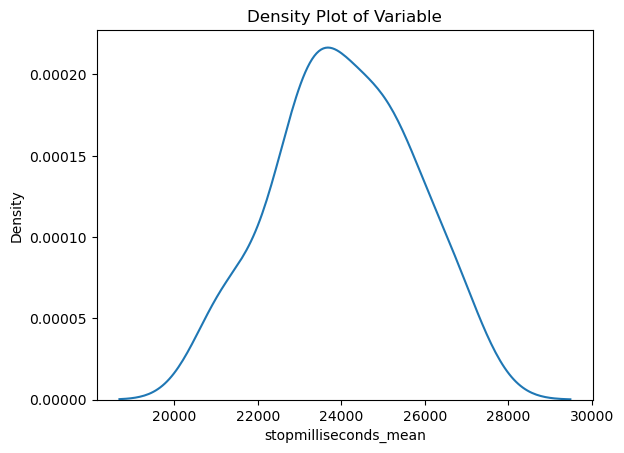

year                      2022.0
driverId                   855.0
raceId                    1074.0
stopmilliseconds_mean    27217.0
next_raceId               1078.0
next_positionOrder          19.0
dtype: float64

In [32]:
import seaborn as sns
Q1= analysis_grouped_by_driver_sample_df_final['stopmilliseconds_mean'].quantile(0.25)
display(Q1)
Q3= analysis_grouped_by_driver_sample_df_final['stopmilliseconds_mean'].quantile(0.75)
display(Q3)




IQR = Q3 - Q1
regression_df_corrected_filtered = analysis_grouped_by_driver_sample_df_final[(analysis_grouped_by_driver_sample_df_final['stopmilliseconds_mean'] >= Q1 - 1.5 * IQR) & (analysis_grouped_by_driver_sample_df_final['stopmilliseconds_mean'] <= Q3 + 1.5 * IQR)]
sns.kdeplot(regression_df_corrected_filtered['stopmilliseconds_mean'])
plt.title('Density Plot of Variable')
plt.show()
regression_df_corrected_filtered.max()

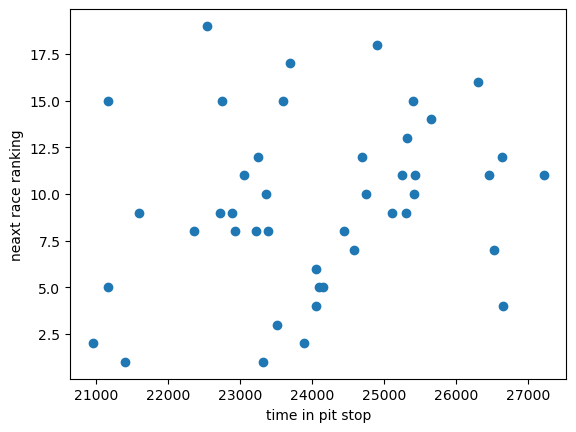

In [27]:
plt.scatter(x = regression_df_corrected_filtered["stopmilliseconds_mean"], y = regression_df_corrected_filtered["next_positionOrder"])
plt.xlabel("time in pit stop")
plt.ylabel("neaxt race ranking")
plt.show()

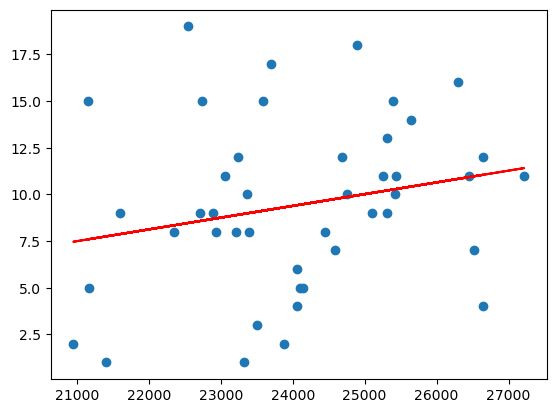

In [29]:
slope, intercept = np.polyfit(regression_df_corrected_filtered["stopmilliseconds_mean"], regression_df_corrected_filtered["next_positionOrder"], 1)

# Generate points for the line of best fit
line_of_best_fit = slope * regression_df_corrected_filtered["stopmilliseconds_mean"] + intercept

# Plot the original data and the line of best fit
plt.scatter(regression_df_corrected_filtered["stopmilliseconds_mean"], regression_df_corrected_filtered["next_positionOrder"], label='Data points')
plt.plot(regression_df_corrected_filtered["stopmilliseconds_mean"], line_of_best_fit, color='red', label='Line of Best Fit')